In [1]:
import pandas as pd
import numpy as np

##### 数据查看

In [2]:
# 附件一至附件四
data1 = pd.read_excel("CUMCM2023Problems/C题/6 个蔬菜品类的商品信息.xlsx")
data2 = pd.read_excel("CUMCM2023Problems/C题/销售流水明细数据.xlsx")
data3 = pd.read_excel("CUMCM2023Problems/C题/蔬菜类商品的批发价格.xlsx")
data4 = pd.read_excel("CUMCM2023Problems/C题/蔬菜类商品的近期损耗率.xlsx")

In [3]:
print(data1.columns)
print(data2.columns)
print(data3.columns)
print(data4.columns)

Index(['单品编码', '单品名称', '分类编码', '分类名称'], dtype='object')
Index(['销售日期', '扫码销售时间', '单品编码', '销量(千克)', '销售单价(元/千克)', '销售类型', '是否打折销售'], dtype='object')
Index(['日期', '单品编码', '批发价格(元/千克)'], dtype='object')
Index(['单品编码', '单品名称', '损耗率(%)'], dtype='object')


In [4]:
data2[data2['是否打折销售'] == '是'][['销售日期', '扫码销售时间']].value_counts()

销售日期        扫码销售时间      
2021-08-15  11:45:26.233    2
2020-07-01  13:10:00.170    1
2022-09-28  19:21:04.405    1
            17:58:01.589    1
            18:24:14.777    1
                           ..
2021-10-24  15:56:30.756    1
            17:00:41.951    1
            17:05:07.933    1
            17:09:57.735    1
2023-06-30  21:32:10.219    1
Length: 47365, dtype: int64

In [35]:
# 附件二切分demo，便于编程，最终应删去
data2_replace = data2.sample(100000)

# 删除未售出商品
p = [102900011032145,
     102900011023648,
     102900011011782,
     102900005116776,
     102900005116042]
data1.drop(labels=data1[data1['单品编码'].isin(p)].index, axis=0, inplace=True)
data3.drop(labels=data3[data3['单品编码'].isin(p)].index, axis=0, inplace=True)
data4.drop(labels=data4[data4['单品编码'].isin(p)].index, axis=0, inplace=True)

# 合并表一与表二
datas_replace = pd.merge(data2_replace, data1, how='left', on='单品编码')
datas = pd.merge(data2, data1, how='left', on='单品编码')

x = data2['销售日期'].value_counts().keys().sort_values()
y1 = data1['单品编码'].value_counts().keys().tolist()
y2 = data1['分类编码'].value_counts().keys().tolist()
# datas=[data1,data2,data3,data4]

##### 清洗数据（未发现异常数据，暂时没有此步骤）

In [6]:
# for i in datas:
#     for j in i.columns:
#         print(i[j].value_counts())

### 问题一

In [7]:
# # 获得每日销售总量
# Totaldailysales = pd.DataFrame(
#     columns=['销售日期', '销量(千克)', '单品编码/分类编码', '单品名称', '分类编码', '分类名称'])
# Totaldailysales.set_index(['销售日期', '单品编码/分类编码'], drop=True, inplace=True)
# for i in datas['销售日期'].value_counts().keys():
#     daydata = datas[datas['销售日期'] == i]
#     for j in daydata['单品编码'].value_counts().keys():
#         daydata1 = daydata[daydata['单品编码'] == j]
#         Totaldailysales.loc[(i, j), :] = [sum(daydata1['销量(千克)'])] + daydata1.iloc[0][
#             ['单品名称', '分类编码', '分类名称']].tolist()
#     for j in daydata['分类编码'].value_counts().keys():
#         daydata2 = daydata[daydata['分类编码'] == j]
#         Totaldailysales.loc[(i, j), :] = [sum(daydata2['销量(千克)'])] + [None] + daydata2.iloc[0][
#             ['分类编码', '分类名称']].tolist()
# # 获得每日销售总量
# Totaldailysales_replace = pd.DataFrame(
#     columns=['销售日期', '销量(千克)', '单品编码/分类编码', '单品名称', '分类编码', '分类名称'])
# Totaldailysales_replace.set_index(['销售日期', '单品编码/分类编码'], drop=True, inplace=True)
# for i in datas_replace['销售日期'].value_counts().keys():
#     daydata = datas_replace[datas['销售日期'] == i]
#     for j in daydata['单品编码'].value_counts().keys():
#         daydata1 = daydata[daydata['单品编码'] == j]
#         Totaldailysales_replace.loc[(i, j), :] = [sum(daydata1['销量(千克)'])] + daydata1.iloc[0][
#             ['单品名称', '分类编码', '分类名称']].tolist()
#     for j in daydata['分类编码'].value_counts().keys():
#         daydata2 = daydata[daydata['分类编码'] == j]
#         Totaldailysales_replace.loc[(i, j), :] = [sum(daydata2['销量(千克)'])] + [None] + daydata2.iloc[0][
#             ['分类编码', '分类名称']].tolist()
# 
# #补充Totaldailysales表
# for i in y1+y2:
#     for j in x:
#         try:
#             Totaldailysales.loc[(j, i)]
#         except:
#             Totaldailysales.loc[(j, i), :] = [0, None, None, None]

In [8]:
# 获得每日销售总量
Totaldailysales = pd.DataFrame(columns=['销售日期'] + y1 + y2)

Totaldailysales.set_index(['销售日期'], drop=True, inplace=True)
for i in x:
    daydata = datas[datas['销售日期'] == i]
    for j in daydata['单品编码'].value_counts().keys():
        daydata1 = daydata[daydata['单品编码'] == j]
        Totaldailysales.loc[i, j] = sum(daydata1['销量(千克)'])
    for j in daydata['分类编码'].value_counts().keys():
        daydata2 = daydata[daydata['分类编码'] == j]
        Totaldailysales.loc[i, j] = sum(daydata2['销量(千克)'])


In [9]:
Totaldailysales

,102900005115168,102900011031100,102900011031735,102900011031742,102900011031759,102900011032022,102900011032206,102900011032213,102900011032220,102900011032237,...,102900011034354,102900011035481,102900011035764,106973990980123,1011010101,1011010801,1011010504,1011010402,1011010501,1011010201
销售日期,,,,,,,,,,,,,,,,,,,,,
2020-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,205.402,35.365,76.715,4.85,35.374,46.64
2020-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,198.362,48.51,66.064,4.6,32.199,43.943
2020-07-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,190.779,42.442,64.253,9.572,35.896,42.076
2020-07-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,236.587,47.262,81.282,5.439,57.067,55.662
2020-07-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,223.899,73.213,98.496,4.019,61.816,55.474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26,NaN,20.0,NaN,NaN,NaN,15.0,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,80.524,39.582,72.185,10.384,21.224,8.083
2023-06-27,NaN,19.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,127.278,38.708,67.12,16.454,8.415,14.272
2023-06-28,NaN,18.0,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,130.182,53.742,68.534,14.946,15.651,16.069


###### 可视化,横坐标为每一天，纵坐标为当天的销售总额（kg)，这里的是分类（6类）绘图，将第7行改为y1即为对每一个单品绘图（太多了点）

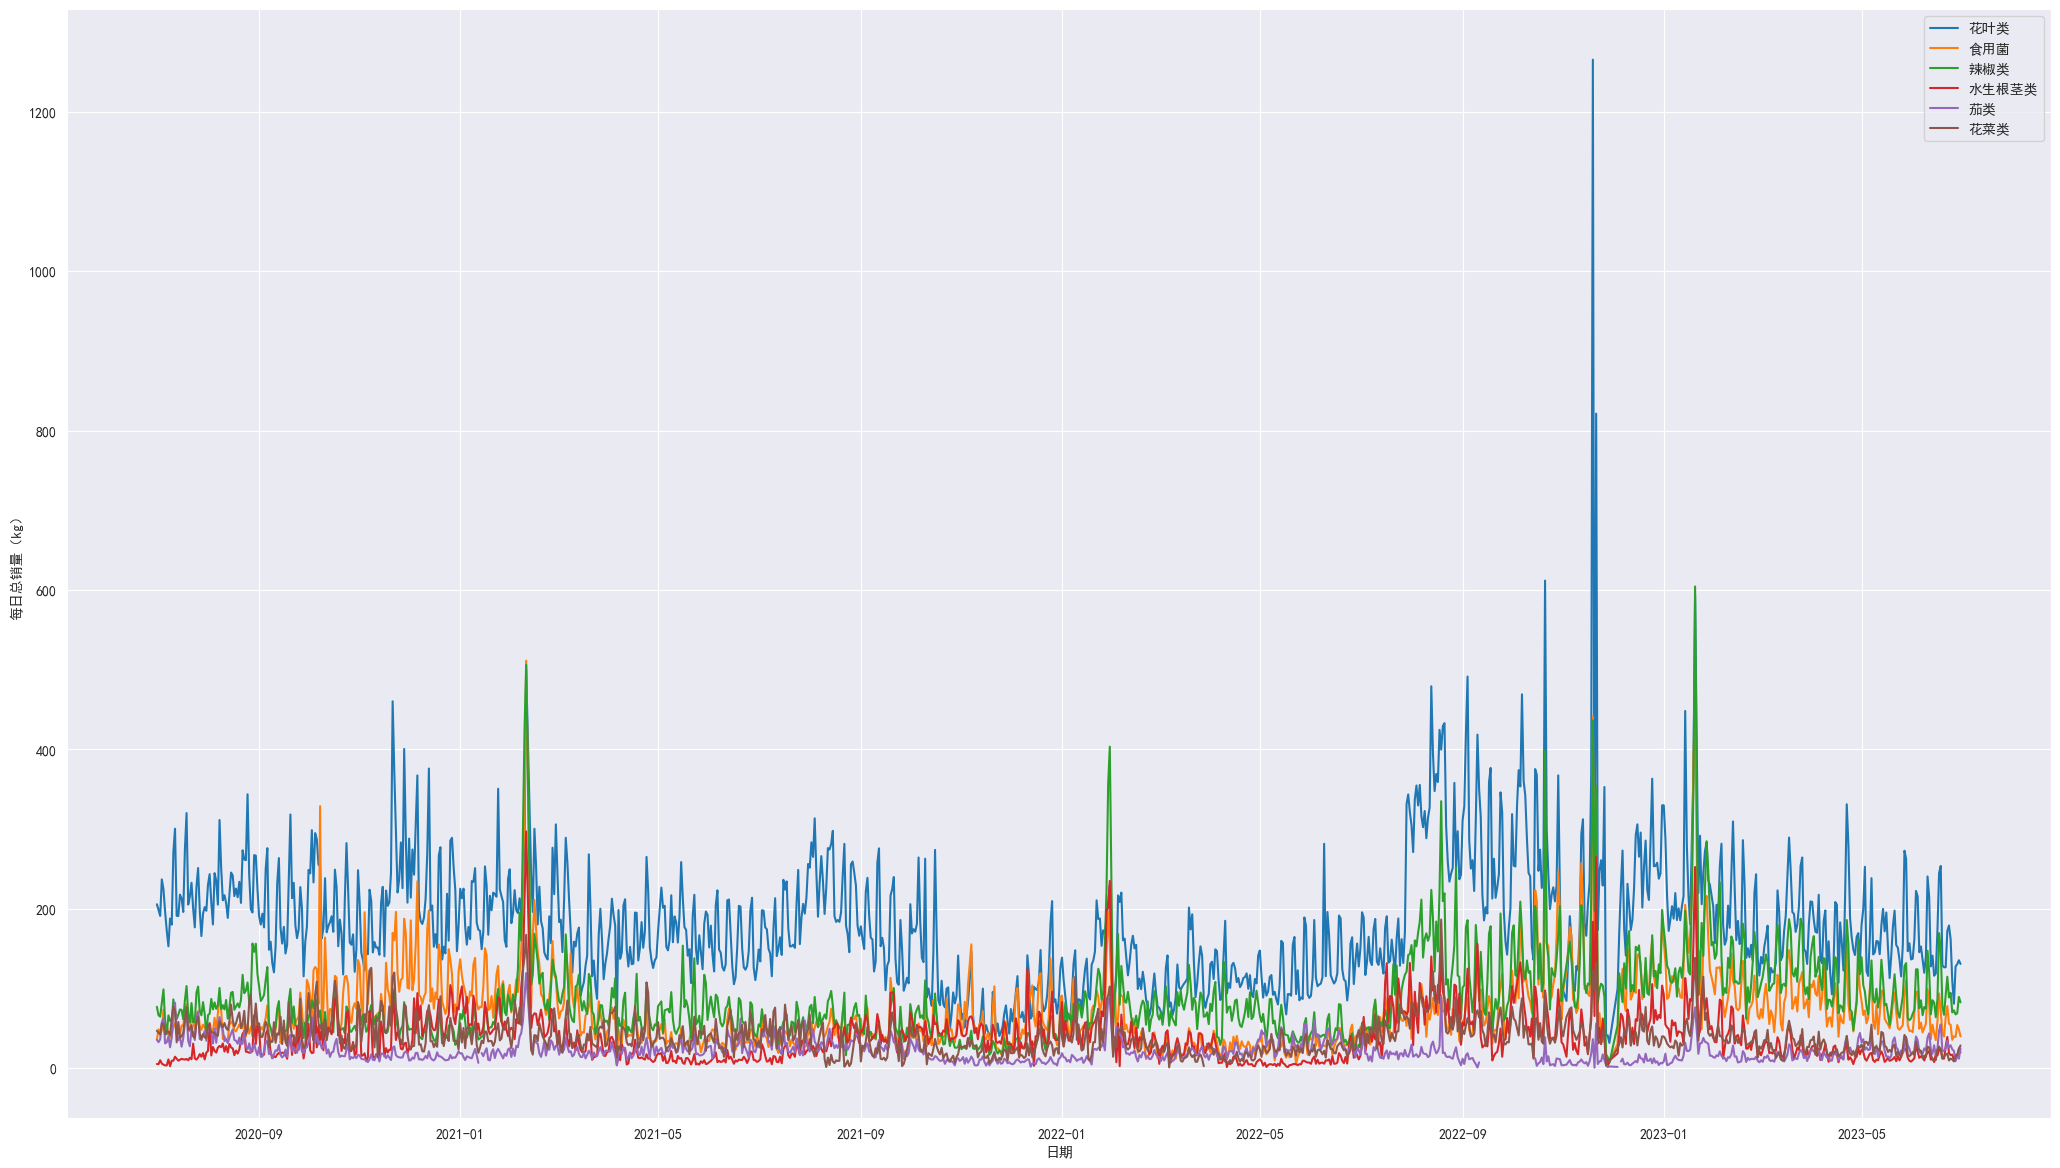

In [10]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(25.60, 14.40))
lines = []
j = 0
# for i in y1:
for i in y2:
    y = []
    j = j + 1
    line, = plt.plot(x, Totaldailysales[i])
    lines.append(line)
# plt.xticks(rotation=90)
plt.legend(handles=lines, labels=['花叶类', '食用菌', '辣椒类', '水生根茎类', '茄类', '花菜类'], loc='best')
plt.xlabel('日期')
plt.ylabel('每日总销量（kg）')
plt.show()

###### y1出现尖峰，检查发现为2022-11-21日，2022-11-21,102900005118831,407.0,娃娃菜,1011010101,花叶类，买了407kg娃娃菜。是否需要剔除？

###### y2出现尖峰，检查发现为2022-11-19日，不知道为什么这一天的流水多了很多，其他时候是1000单上下，这一天到了3000单，但是没有发现哪一单有问题的，应该单纯成交量大

In [11]:
import scipy.stats as stats
import numpy as np
import pandas as pd

Averagedailyvolume = pd.DataFrame(columns=['单品编码/分类编码', '平均每日销量(千克)'])
Averagedailyvolume.set_index(['单品编码/分类编码'], drop=True, inplace=True)
Totaldays = Totaldailysales.shape[0]
for i in y2:
    Averagedailyvolume.loc[i, '平均每日销量(千克)'] = np.nansum(Totaldailysales[i]) / Totaldays
    # Averagedailyvolume.loc[i,'平均每日销量(千克)']=np.nanmean(Totaldailysales[i])
Averagedailyvolume.dropna(axis=0, how='all', inplace=True)
Averagedailyvolume

,平均每日销量(千克)
单品编码/分类编码,
1011010101,182.968643
1011010801,70.126014
1011010504,84.413483
1011010402,37.402169
1011010501,20.674453
1011010201,38.494425


###### 数据标准化

In [12]:
from sklearn.preprocessing import StandardScaler

transfer = StandardScaler()
Averagedailyvolume = transfer.fit_transform(
    np.array([Averagedailyvolume.index, Averagedailyvolume['平均每日销量(千克)']]).T)

##### levene检验，Brown-Forsythe检验，

In [13]:
# edu = [Averagedailyvolume.index, Averagedailyvolume['平均每日销量(千克)']]
# # edu=[Averagedailyvolume[:,0], Averagedailyvolume[:,1]]
# # levene检验
# (levene_W, levene_p) = stats.levene(*edu)
# print(levene_W, levene_p)
# 
# # Brown-Forsythe检验
# (Brown_W, Brown_p) = stats.levene(edu[0], edu[1], center='median')
# print(Brown_W, Brown_p)
# # f检验
# f_value, p_value = stats.f_oneway(edu[0], edu[1])
# print("F-value:", f_value)
# print("P-value:", p_value)

###### 方差分析

In [14]:
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# from statsmodels.formula.api import ols
# from scipy.stats import levene
# from scipy.stats import kstest
# from statsmodels.stats.anova import anova_lm  #方差分析
# from statsmodels.stats.multicomp import pairwise_tukeyhsd  #两两比较
# import pingouin as pg
# 
# 
# def anova_d(column, data):
#     if levene_p.pvalue > 0.05:
#         formula = column + "~ C(market_type)"
#         model = anova_lm(ols(formula, data=data).fit())
#         print(model)
#         re = pairwise_tukeyhsd(data[column], data['market_type'], alpha=0.05)
#         print('多重比较：')
#         print(re.summary())
#     else:
#         model = pg.welch_anova(dv=column, between='market_type', data=data)
#         print(model)
#         print('多重比较：')
#         print(pg.pairwise_gameshowell(dv=column, between='market_type', data=data))

In [15]:
# import scipy.stats as stats
# import numpy as np
# import pandas as pd
# 
# for i in data2['单品编码'].value_counts().keys():
#     # levene检验（未通过）
#     (W, p) = stats.levene(data2[data2['单品编码'] == i]['销量(千克)'])
#     print(W, p)
# 
#     # Brown-Forsythe检验（未通过）
#     (W, p) = stats.levene(data2[data2['单品编码'] == i]['销量(千克)'], center='median')
#     print(W, p)
# 
#     f_value, p_value = stats.f_oneway(data2[data2['单品编码'] == i]['销量(千克)'])
#     print("F-value:", f_value)
#     print("P-value:", p_value)

In [16]:
# #两组数对比时，检查独立T检验和F检验是否一致
# 
# # First, calculate the F- and the T-values, ...
# F_statistic, pVal = stats.f_oneway(data2['单品编码'], data2['销量(千克)'])
# t_val, pVal_t = stats.ttest_ind(data2['单品编码'], data2['销量(千克)'])
# 
# # ... and show that t**2 = F
# print('\nT^2 == F: ------------------------------------------')
# print(('From the t-test we get t^2={0:5.3f}, and from the F-test F={1:5.3f}'.format(t_val ** 2, F_statistic)))
# 
# # numeric test
# np.testing.assert_almost_equal(t_val ** 2, F_statistic, decimal=0)
# 
# print(F_statistic)


###### 无法通过levene检验（方差齐次），不太适合方差分析

###### 可视化,关系矩阵热力图，将第4行改为y1即为对每一个单品绘图（基本没法看）

销售日期
2020-07-01    205.402
2020-07-02    198.362
2020-07-03    190.779
2020-07-04    236.587
2020-07-05    223.899
               ...   
2023-06-26     80.524
2023-06-27    127.278
2023-06-28    130.182
2023-06-29     135.09
2023-06-30    130.464
Name: 1011010101, Length: 1085, dtype: object
销售日期
2020-07-01    35.365
2020-07-02     48.51
2020-07-03    42.442
2020-07-04    47.262
2020-07-05    73.213
               ...  
2023-06-26    39.582
2023-06-27    38.708
2023-06-28    53.742
2023-06-29    48.314
2023-06-30    39.572
Name: 1011010801, Length: 1085, dtype: object
销售日期
2020-07-01    76.715
2020-07-02    66.064
2020-07-03    64.253
2020-07-04    81.282
2020-07-05    98.496
               ...  
2023-06-26    72.185
2023-06-27     67.12
2023-06-28    68.534
2023-06-29    89.113
2023-06-30    82.286
Name: 1011010504, Length: 1085, dtype: object
销售日期
2020-07-01      4.85
2020-07-02       4.6
2020-07-03     9.572
2020-07-04     5.439
2020-07-05     4.019
               ...  
2023-06-26  

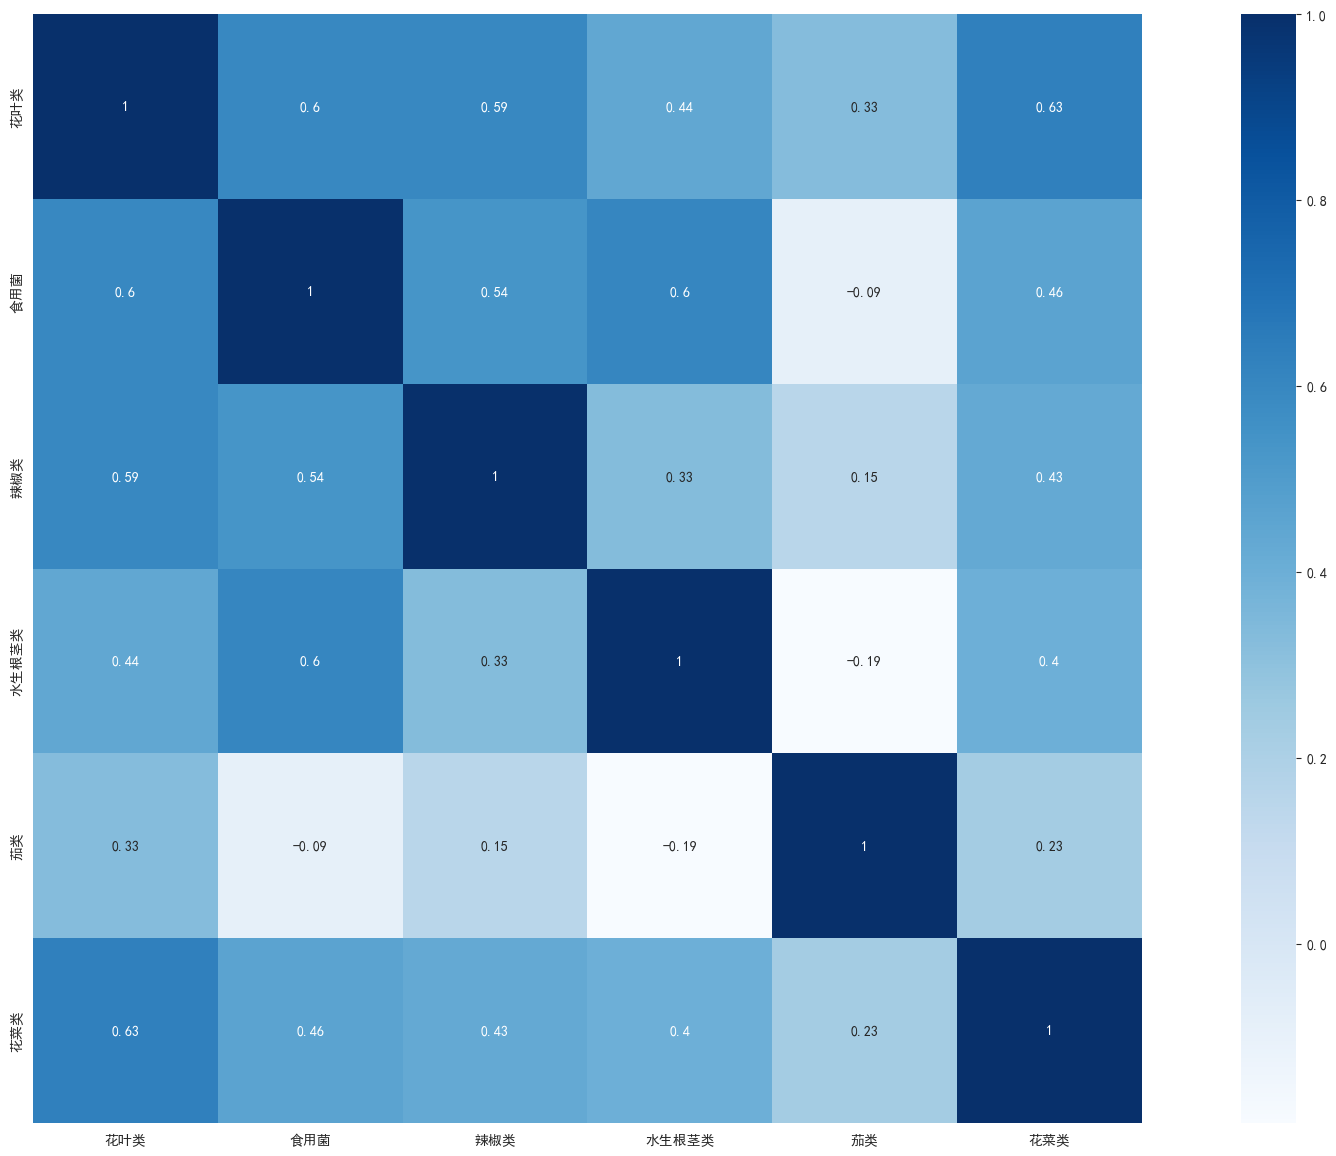

In [42]:
import seaborn as sns

Correlationmatrix = pd.DataFrame()
# for i in y1:
for i in y2:
    name = data1[data1['分类编码'] == i]['分类名称'].iloc[0]
    Correlationmatrix[name] = Totaldailysales[i]
    print(Totaldailysales[i])
Correlationmatrix = Correlationmatrix.applymap(float)
plt.figure(figsize=(25.60, 14.40))
sns.heatmap(Correlationmatrix.corr(method='spearman'), annot=True, vmax=1, square=True, cmap="Blues")
plt.show()

##### 对每一单品进行相关矩阵计算

In [18]:
import seaborn as sns

Correlationmatrix = pd.DataFrame()
for i in y1:
    name = data1[data1['单品编码'] == i]['单品名称'].iloc[0]
    Correlationmatrix[name] = Totaldailysales[i]

Correlationmatrix.corr()

C:\Users\dell\AppData\Local\Temp\ipykernel_25680\2845858013.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Correlationmatrix[name] = Totaldailysales[i]
C:\Users\dell\AppData\Local\Temp\ipykernel_25680\2845858013.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Correlationmatrix[name] = Totaldailysales[i]
C:\Users\dell\AppData\Local\Temp\ipykernel_25680\2845858013.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Conside

""


##### eta系数检测

In [19]:
# def correlation_ratio(component, total):
#     y_component_avg = np.mean(component)
#     y_total_avg = np.mean(total)
#     numerator = np.sum(np.power(np.subtract(total, y_component_avg), 2))
#     denominator = np.sum(np.power(np.subtract(total, y_total_avg), 2))
#     if denominator == 0:
#         eta = 0.0
#     else:
#         eta = numerator / denominator
#     return 1 - eta
# 
# 
# import numpy as np
# from scipy import stats
# 
# for i in y2:
#     categorylist = data1[data1['分类编码'] == i]['单品编码'].value_counts().keys().tolist()
#     print('************************', data1[data1['分类编码'] == i]['分类名称'].iloc[0], ':***************************')
#     print(stats.kstest(np.log(data2[data2['单品编码'].isin(categorylist)]['销量(千克)']), 'norm'))
#     # for j in categorylist:
#     # print(data1[data1['单品编码']==j]['单品名称'].iloc[0])
#     # print(KStest(data2[data2['单品编码'] == j]['销量(千克)']))
#     # print(correlation_ratio(data2[data2['单品编码'] == j]['销量(千克)'],
#     #                         data2[data2['单品编码'].isin(categorylist)]['销量(千克)']))
#     print(stats.kstest((data2[data2['单品编码'].isin(categorylist)]['销量(千克)']),'norm'))


In [20]:
data1.columns

Index(['单品编码', '单品名称', '分类编码', '分类名称'], dtype='object')

### 第二问

In [41]:
# 导入所需的包
import pandas as pd

# 合并销售数据和批发价格数据
merged_data_for_relation = pd.merge(data2, data3, left_on=["销售日期", "单品编码"], right_on=["日期", "单品编码"], how="left")

# 添加商品分类信息到merged_data_for_relation中
merged_data_for_relation = pd.merge(merged_data_for_relation, data1[["单品编码", "分类名称"]], on="单品编码", how="left")

# 计算总销售额和总成本
merged_data_for_relation["销售额"] = merged_data_for_relation["销量(千克)"] * merged_data_for_relation["销售单价(元/千克)"]
merged_data_for_relation["成本"] = merged_data_for_relation["销量(千克)"] * merged_data_for_relation["批发价格(元/千克)"]

# 按蔬菜品类分组计算总销售额和总成本
grouped_data_corrected = merged_data_for_relation.groupby("分类名称").agg(
    总销售额=("销售额", "sum"),
    总成本=("成本", "sum")
).reset_index()

# 计算成本加成比率
grouped_data_corrected["成本加成比率"] = (grouped_data_corrected["总销售额"] / grouped_data_corrected["总成本"]) - 1

print(grouped_data_corrected[["分类名称", "成本加成比率"]])

    分类名称    成本加成比率
0  水生根茎类  0.445268
1    花叶类  0.663071
2    花菜类  0.534626
3     茄类  0.569875
4    辣椒类  0.588958
5    食用菌  0.573229


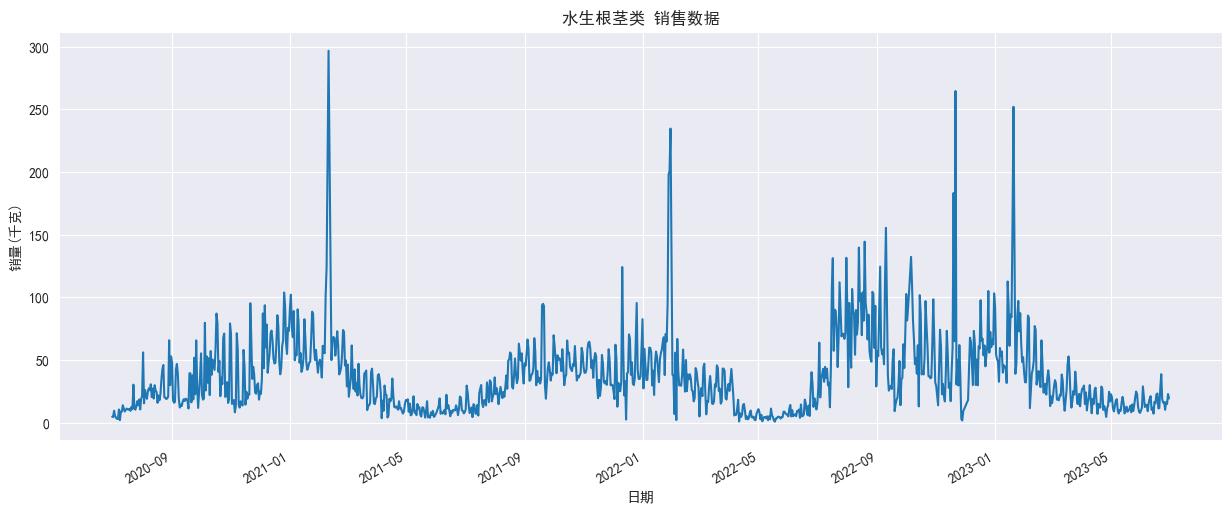

B:\anaconda3\envs\HUSKY\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
B:\anaconda3\envs\HUSKY\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
B:\anaconda3\envs\HUSKY\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
B:\anaconda3\envs\HUSKY\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
B:\anaco

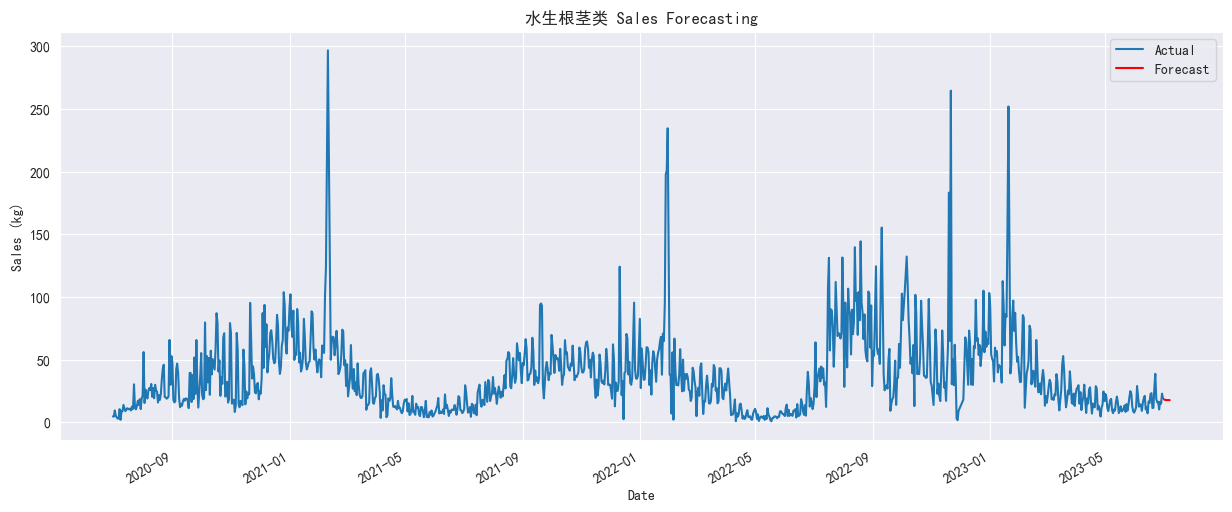

'Model successfully forecasted!'

In [49]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
# 选择“水生根茎类”这一蔬菜品类的数据
category_example = "水生根茎类"
test_start_date="2023-07-01"

# 按天和蔬菜品类汇总销售量

# 使用附件1的数据来获取每种蔬菜的分类名称
merged_data_corrected = pd.merge(data2, data3, left_on=["单品编码", "销售日期"], right_on=["单品编码", "日期"], how="left")
merged_data_corrected.drop("日期", axis=1, inplace=True)
merged_data_with_category = pd.merge(merged_data_corrected, data1[['单品编码', '分类名称']], on="单品编码", how="left")

# 按天和蔬菜品类汇总销售量
daily_sales_final = merged_data_with_category.groupby(['销售日期', '分类名称'])['销量(千克)'].sum().reset_index()


example_data = daily_sales_final[daily_sales_final['分类名称'] == category_example].set_index('销售日期')

# 绘制销售数据图
plt.figure(figsize=(15, 6))
example_data['销量(千克)'].plot(title=f'{category_example} 销售数据')
plt.xlabel('日期')
plt.ylabel('销量(千克)')
plt.grid(True)
plt.show()

# 重新使用ARIMA模型进行预测
try:
    model = ARIMA(example_data['销量(千克)'], order=(1,1,1))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=7)

    # 绘制原始数据和预测数据
    plt.figure(figsize=(15, 6))
    example_data['销量(千克)'].plot(label='Actual')
    forecast.index = pd.date_range(start=test_start_date, periods=7, freq='D')
    forecast.plot(label='Forecast', color='red')
    plt.title(f'{category_example} Sales Forecasting')
    plt.xlabel('Date')
    plt.ylabel('Sales (kg)')
    plt.legend()
    plt.grid(True)
    plt.show()

except Exception as e:
    error_message = str(e)

error_message if 'error_message' in locals() else "Model successfully forecasted!"


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools

# 加载数据
attachment1 = data1
attachment2 = data2
attachment3 = data3

# 合并数据
merged_data = pd.merge(attachment2, attachment3, left_on=["单品编码", "销售日期"], right_on=["单品编码", "日期"], how="left").drop("日期", axis=1)
merged_data_with_category = pd.merge(merged_data, attachment1[['单品编码', '分类名称']], on="单品编码", how="left")

# 获取指定蔬菜品类的数据并拟合ARIMA模型
def fit_arima_for_category(category_name):
    category_data = merged_data_with_category[merged_data_with_category['分类名称'] == category_name].groupby('销售日期').sum()['销量(千克)']

    # 定义p, d, q参数范围
    p = d = q = range(0, 3)
    pdq = list(itertools.product(p, d, q))

    best_aic = float("inf")
    best_order = None
    best_model = None

    for order in pdq:
        try:
            temp_model = ARIMA(category_data, order=order)
            temp_model_fit = temp_model.fit()
            if temp_model_fit.aic < best_aic:
                best_aic = temp_model_fit.aic
                best_order = order
                best_model = temp_model_fit
        except:
            continue

    return best_order, best_aic, best_model

# 尝试为"水生根茎类"和"食用菌"拟合ARIMA模型
order_aquatic, aic_aquatic, model_aquatic = fit_arima_for_category("水生根茎类")
order_fungus, aic_fungus, model_fungus = fit_arima_for_category("食用菌")


C:\Users\dell\AppData\Local\Temp\ipykernel_25680\3509653044.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  category_data = merged_data_with_category[merged_data_with_category['分类名称'] == category_name].groupby('销售日期').sum()['销量(千克)']
B:\anaconda3\envs\HUSKY\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
B:\anaconda3\envs\HUSKY\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
B:\anaconda3\envs\HUSKY\lib\site-packages\statsmodels\tsa\base\ts